In [1]:
from surprise import Dataset
from surprise.model_selection import cross_validate

import os
from surprise import Reader
from surprise.model_selection import KFold

from surprise import SVD
from surprise import KNNBasic
from surprise import NMF


from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

In [2]:
#load data from a file
file_path = os.path.expanduser('restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)

In [3]:
# define a cross-validation iterator
# this makes sure all the folds across algorithms are comparable and not shuffled
kf = KFold(n_splits=3)

In [3]:
algorithms = (SVD(), SVD(biased=False), NMF(), 
              KNNBasic(sim_options = {'user_based': True }), 
              KNNBasic(sim_options = {'user_based': False}))

In [5]:
# compare the performance across 5 algorithms using 3 folds

for algo in algorithms:
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        algo.fit(trainset)
        predictions = algo.test(testset)
        rmse = accuracy.rmse(predictions, verbose=False)
        print (rmse)
        
for algo in algorithms:
    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        predictions = algo.test(testset)
        mae = accuracy.mae(predictions, verbose=False)
        print (mae)

0.945985260250954
0.9435861933721188
0.9440817469643541
0.9619784202999039
0.9689343589090321
0.9680355916971263
0.9718901226211364
0.975023232583178
0.980578970941723
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9911831144083612
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9849661914714496
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9901974154095847
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9806079648007882
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9836238908819781
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9924316640978841
0.7433166222527737
0.744327298154643
0.7456610998832873
0.7588545874294578
0.767327290719045
0.7612418593798758
0.7646982391590907
0.7686548854761277
0.7671478149450299
Computing the msd similarity matrix...
Done computing similarity matrix.
0.7787992279834315
Computing the msd s

In [4]:
#Examine how the cosine, MSD (Mean Squared Difference), 
#and Pearson similarities impact the performances of 
#User based Collaborative Filtering and Item based Collaborative Filtering

algorithms = (KNNBasic(sim_options = { 'name':'MSD','user_based': True }),
              KNNBasic(sim_options = { 'name':'cosine','user_based': True }),
              KNNBasic(sim_options = { 'name':'pearson','user_based': True }),
              KNNBasic(sim_options = { 'name':'MSD','user_based': False }),
              KNNBasic(sim_options = { 'name':'cosine','user_based': False }),
              KNNBasic(sim_options = { 'name':'pearson','user_based': False }))         
                       
for algo in algorithms:
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        rmse = accuracy.rmse(predictions, verbose=False)
        mae = accuracy.mae(predictions, verbose=False)
        print ('rmse:', rmse, 'mae:', mae)

Computing the msd similarity matrix...
Done computing similarity matrix.
rmse: 0.989108580596601 mae: 0.7843224545842683
Computing the msd similarity matrix...
Done computing similarity matrix.
rmse: 0.9896774805240383 mae: 0.7822674278732016
Computing the msd similarity matrix...
Done computing similarity matrix.
rmse: 0.9830576490539169 mae: 0.7760201931157208
Computing the cosine similarity matrix...
Done computing similarity matrix.
rmse: 1.0227105177439633 mae: 0.8083696773639046
Computing the cosine similarity matrix...
Done computing similarity matrix.
rmse: 1.0256182245240548 mae: 0.812277011697545
Computing the cosine similarity matrix...
Done computing similarity matrix.
rmse: 1.014904216192712 mae: 0.8048702270518837
Computing the pearson similarity matrix...
Done computing similarity matrix.
rmse: 1.02150427743079 mae: 0.8110949882387386
Computing the pearson similarity matrix...
Done computing similarity matrix.
rmse: 1.017438178172319 mae: 0.8079506921121776
Computing the

In [30]:
#Identify the best K for User/Item based collaborative filtering in terms of RMSE. 
#Is the the best K of User based collaborative filtering 
#the same with the best K of Item based collaborative filtering?


import numpy as np
import matplotlib.pyplot as plt
import statistics

In [11]:
#identify the best k: User based collaborative filtering

k = []
mean = []
sd = []

for i in range(5,30): #iterate over different k values
    algo = KNNBasic(k=i, sim_options = {'name':'MSD', 'user_based': True })
    scores = []
    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        predictions = algo.test(testset)
        rmse = accuracy.rmse(predictions, verbose=False)
        scores.append(rmse)
    k.append(i)
    mean.append(statistics.mean(scores))
    sd.append(statistics.pstdev(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [14]:
k = list(range(5, 30))
print ('k:', k)
print ('mean:', mean)
print ('sd:', sd)

k: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
mean: [1.0384055216404775, 1.0247356557817704, 1.0142022147593923, 1.009705716913927, 1.003980219963317, 0.9998263614844985, 0.9971524360034623, 0.9947777950824038, 0.9934122467123621, 0.990900935724229, 0.9887748361026336, 0.9898604550997461, 0.9879212105522936, 0.9885673697253278, 0.985967780329247, 0.9862164420650135, 0.987428346413562, 0.985890411469261, 0.9864616803223225, 0.9857021573414205, 0.9858925334914402, 0.9859930786644105, 0.986098380961151, 0.9869141831427677, 0.9864773421373884]
sd: [0.0029932642767614703, 0.0011759508214673187, 0.003649912678586274, 0.0024807830164557372, 0.00045764785789522306, 0.0016173402177529668, 0.002526158377811088, 0.0032947215033314625, 0.0023141848162910026, 0.001951404640894763, 0.005083943392108101, 0.0007703044084129023, 0.006645268882185288, 0.0021821380099974748, 0.0032342998730824466, 0.001809461844177894, 0.0033017982651189124, 0.00234496

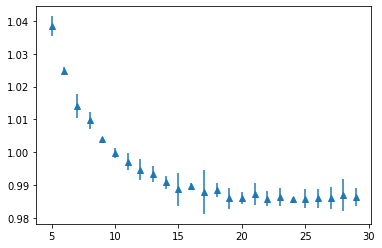

In [15]:
plt.errorbar(k, mean, sd, linestyle='None', marker='^')
plt.show()



In [22]:
#identify the best k: item based collaborative filtering

k = []
mean = []
sd = []

for i in range(5,30): #iterate over different k values
    algo = KNNBasic(k=i, sim_options = {'name':'MSD', 'user_based': False })
    scores = []
    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        predictions = algo.test(testset)
        rmse = accuracy.rmse(predictions, verbose=False)
        scores.append(rmse)
    k.append(i)
    mean.append(statistics.mean(scores))
    sd.append(statistics.pstdev(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

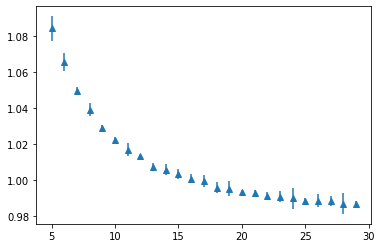

In [23]:
plt.errorbar(k, mean, sd, linestyle='None', marker='^')
plt.show()



In [11]:
#how many unique users and items are there?
import pandas as pd

df = pd.read_csv('restaurant_ratings.txt', sep="	", header=None)


In [14]:
df.columns = ["user", "item", "rating", "timestamp"]

print ('users:', df['user'].nunique(), 'items:', df['item'].nunique())
print ('row counts:', df.shape)
 

users: 943 items: 1682
row counts: (100000, 4)
